In [36]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (13, 9)})

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from utils import read_pdf, parser_model
from nlp import topic

In [29]:
data_files = [f"data/{filename}" for filename in os.listdir("data") if ".pdf" in filename]

In [30]:
text = read_pdf.path_to_sentences(data_files[0])

In [31]:
model, corpus, sentences = topic.get_topics(text, num_topics = 50)

In [32]:
def format_topics_sentences(ldamodel, corpus, texts):
    
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [33]:
df_topic_sents_keywords = format_topics_sentences(model, corpus, sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,44.0,0.9409,"voting, policy, company, management, interest,...","[3Content, introduction, manage, conflict, int..."
1,1,14.0,0.5198,"board, director, executive, company, Ł, shareh...","[Boards, director]"
2,2,5.0,0.6092,"auditor, NN, IP, asset, Group, board, proposal...","[Remuneration, benefit, Capital, structure, as..."
3,3,37.0,0.9598,"NN, asset, Group, IP, policy, interest, busine...","[asset, manage, account, client, NN, Group, ™,..."
4,4,23.0,0.9807,"company, ™, business, right, investee, value, ...","[general, NN, IP, intention, participate, dire..."
5,5,4.0,0.9891,"company, NN, risk, voting, shareholder, Ł, IP,...","[believe, environmental, social, corporate, go..."
6,6,4.0,0.9808,"company, NN, risk, voting, shareholder, Ł, IP,...","[document, describe, framework, NN, IP, use, e..."
7,7,44.0,0.9738,"voting, policy, company, management, interest,...","[policy, result, activity, focus, protect, enh..."
8,8,0.0,0.9650,"governance, corporate, company, practice, ™, s...","[dialogue, director, investee, company, help, ..."
9,9,0.0,0.9764,"governance, corporate, company, practice, ™, s...","[NN, IP, decide, base, corporate, governance, ..."


In [34]:
def plot_bigrams(sentences, n = 10):
    bigram_tf_idf_vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=n, use_idf=True)
    bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform([" ".join(sent) for sent in sentences])
    
    words = bigram_tf_idf_vectorizer.get_feature_names()
    
    total_counts = np.zeros(len(words))
    for t in bigram_tf_idf:
        total_counts += t.toarray()[0]
        
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig, ax = plt.subplots()
    ax.set_title(f"{n} most common bigrams")
    
    sns.barplot(x_pos, counts, palette="Blues_r", ax = ax)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(words, rotation = 45)
    
    ax.set_xlabel("Bi-grams")
    
    
    return fig,

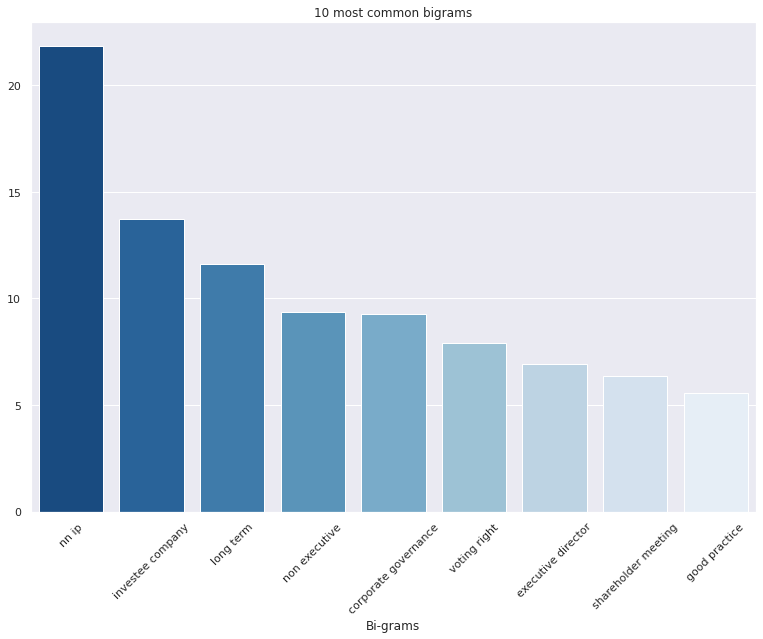

In [40]:
fig = plot_bigrams(sentences, n = 10)